In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time, json, os, csv

from scipy.stats import linregress
from citipy import citipy
from pprint import pprint

# Hi Markers, please use your onw API keys to run the script, thank you!
from api_keys import weather_api_key
from api_keys import g_key

In [167]:
# Define function to set data type
def set_integer(data_types, pddf):
    for row in data_types:
        pddf[row] = pddf[row].astype(int)

# integer = int

In [168]:
# Read data files
house_data_path = "data_source/Melbourne_housing_FULL.csv"
school_data_path = "data_source/dv309_schoollocations2021.csv"
crime_rate_path = "data_source/Data_Tables_LGA_Criminal_Incidents_Year_Ending_March_2021.xlsx"

house_data = pd.read_csv(house_data_path)
school_data = pd.read_csv(school_data_path, encoding = "cp1252")
crime_data = df = pd.read_excel (crime_rate_path, sheet_name = "Table 03")

# Set output file path
house_file = "data_source/cleaned_source_data/house_cleaned.csv"
school_file = "data_source/cleaned_source_data/school_cleaned.csv"
crime_file = "data_source/cleaned_source_data/crime_cleaned.csv"

In [169]:
house_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,...,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,...,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [28]:
# cleaning house data
house_data_cleaned = house_data.dropna(subset = ["Price"])
house_data_cleaned = house_data_cleaned.drop(["Bedroom2"], axis = "columns")
house_data_cleaned = house_data_cleaned.fillna(0)

# Set up a list for data type
column_list = ["Postcode",
               "Bathroom",
               "Car",
               "Landsize",
               "BuildingArea",
               "YearBuilt",
               "Propertycount",
               "Rooms"]

set_integer(column_list, house_data_cleaned)

house_data_cleaned["Price"] = house_data_cleaned.apply(lambda x: "{:,.0f}".format(x["Price"]), axis = 1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [170]:
house_data_cleaned.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
5,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,...,2.00,1.00,94.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,1.00,2.00,120.00,142.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [16]:
number_house_in_each_suburb= house_data_cleaned["Suburb"].value_counts()
number_house_in_each_suburb

Reservoir          727
Bentleigh East     493
Richmond           439
Preston            415
Brunswick          387
                  ... 
croydon              1
Tecoma               1
Cranbourne East      1
Yarra Glen           1
Kalkallo             1
Name: Suburb, Length: 345, dtype: int64

In [187]:
suburb_price_distance_df= house_data_cleaned[["Suburb", "Price", "Distance", "Type"]].groupby(['Suburb','Type'])['Distance','Price'].mean()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
suburb_price_distance_df

C:\Users\Nasrin\AppData\Local\Temp/ipykernel_12160/2397454152.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  suburb_price_distance_df= house_data_cleaned[["Suburb", "Price", "Distance", "Type"]].groupby(['Suburb','Type'])['Distance','Price'].mean()


Distance      Price
Suburb     Type                     
Abbotsford h         2.70 1221023.44
           t         2.58 1041500.00
           u         2.73  657109.38
Aberfeldie h         8.28 1578846.94
           t         8.46 1195000.00
...                   ...        ...
Yarraville h         6.69 1074319.31
           t         6.62  813340.91
           u         6.76  496355.50
croydon    h        23.00  730000.00
viewbank   t         8.90  885000.00

[816 rows x 2 columns]

In [188]:
df=pd.crosstab(suburb_price_distance_df["Suburb"],
            suburb_price_distance_df["Type"],
            values=suburb_price_distance_df["Distance"],
            aggfunc="mean",
            normalize=True)
df

KeyError: 'Suburb'

In [155]:
def plt(x,y, tick_locations):
    plt.bar(x,y, width=0.1, align="edge")
    plt.xticks(x,tick_locations, rotation="vertical")
    plt.show()

In [157]:
fig = plt.subplots(figsize =(10, 5))
 
h = [12, 30, 1, 8, 22]
u = [28, 6, 16, 5, 10]
t = [29, 3, 24, 25, 17]
 
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
plt.bar(br1, h, color ="r", width = barWidth, edgecolor ="grey", label ="House")
plt.bar(br2, u, color ="g", width = barWidth, edgecolor ="grey", label ="Unit")
plt.bar(br3, t, color ="b", width = barWidth, edgecolor ="grey", label ="Townhouse")
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019'])
 
plt.legend()
plt.show()

AttributeError: 'function' object has no attribute 'bar'

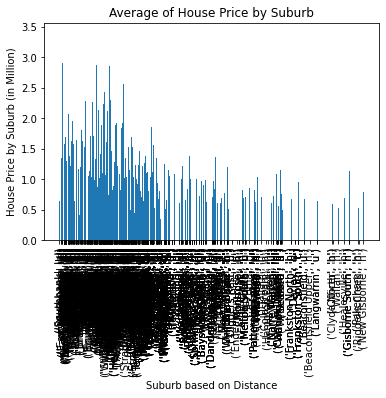

In [172]:
x= suburb_price_distance_df["Distance"]
y= suburb_price_distance_df["Price"]/1000000
plt.bar(x,y, width=0.1, align="edge")
plt.title("Average of House Price by Suburb")
plt.xlabel("Suburb based on Distance")
plt.ylabel("House Price by Suburb (in Million)")
plt.xticks(x,suburb_price_distance_df.index, rotation="vertical")
plt.show()

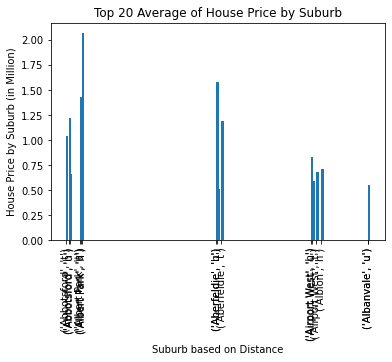

In [176]:
top_twenty= suburb_price_distance_df.head(15)
 
x= top_twenty["Distance"]
y= top_twenty["Price"]/1000000
plt.bar(x,y, width=0.1, align="edge")
plt.title("Top 20 Average of House Price by Suburb")
plt.xlabel("Suburb based on Distance")
plt.ylabel("House Price by Suburb (in Million)")
plt.xticks(x,top_twenty.index, rotation="vertical")
plt.show()

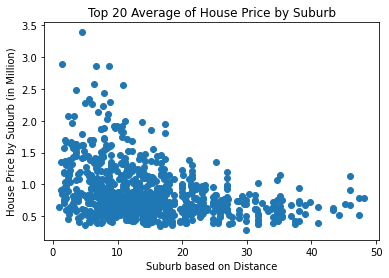

In [174]:
sorted_df=suburb_price_distance_df.sort_values("Price")
 
x= sorted_df["Distance"]
y= sorted_df["Price"]/1000000
plt.scatter(x,y)
plt.title("Top 20 Average of House Price by Suburb")
plt.xlabel("Suburb based on Distance")
plt.ylabel("House Price by Suburb (in Million)")
plt.show()

In [7]:
# house_data_cleaned['Postcode'] = house_data_cleaned['Postcode'].astype(int)
# house_data_cleaned['Bathroom'] = house_data_cleaned['Bathroom'].astype(int)
# house_data_cleaned['Car'] = house_data_cleaned['Car'].astype(int)
# house_data_cleaned['Landsize'] = house_data_cleaned['Landsize'].astype(int)
# house_data_cleaned['BuildingArea'] = house_data_cleaned['BuildingArea'].astype(int)
# house_data_cleaned['YearBuilt'] = house_data_cleaned['YearBuilt'].astype(int)
# house_data_cleaned['Propertycount'] = house_data_cleaned['Propertycount'].astype(int)

# house_data_cleaned.head()

In [8]:
house_data_cleaned.to_csv(house_file, index = False, encoding = "utf-8")

In [9]:
school_data_cleaned = school_data.drop(["SCHOOL_NO",
                                        "Address_Line_2",
                                        "Postal_Address_Line_1",
                                        "Postal_Address_Line_2",
                                        "Postal_Town",
                                        "Postal_State",
                                        "Postal_Postcode"], axis = "columns")

school_data_cleaned = school_data_cleaned.rename({"X": "Lng",
                                                  "Y": "Lat",
                                                  "Address_Line_1": "Address",
                                                  "Address_Town": "Suburb",
                                                  "Address_State": "State",
                                                  "Address_Postcode": "Postcode"}, axis = "columns")


school_data_cleaned.head()

,Education_Sector,Entity_Type,School_Name,School_Type,School_Status,Address,Suburb,State,Postcode,Full_Phone_No,LGA_ID,LGA_Name,Lng,Lat
0,Government,1,Alberton Primary School,Primary,O,21 Thomson Street,Alberton,VIC,3971,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,Allansford and District Primary School,Primary,O,Frank Street,Allansford,VIC,3277,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281
2,Government,1,Avoca Primary School,Primary,O,118 Barnett Street,Avoca,VIC,3467,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502
3,Government,1,Avenel Primary School,Primary,O,40 Anderson Street,Avenel,VIC,3664,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368
4,Government,1,Warrandyte Primary School,Primary,O,5-11 Forbes Street,Warrandyte,VIC,3113,03 9844 3537,421,Manningham (C),145.213980,-37.742675


In [10]:
school_data_cleaned.to_csv(school_file, index = False, encoding = "utf-8")

In [11]:
crime_data

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
0,2021,March,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,1
1,2021,March,Alpine,3691,Glen Creek,C Drug offences,C30 Drug use and possession,C32 Drug possession,1
2,2021,March,Alpine,3691,Gundowring,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1
3,2021,March,Alpine,3691,Gundowring,E Justice procedures offences,E10 Justice procedures,E13 Resist or hinder officer,1
4,2021,March,Alpine,3691,Kergunyah South,B Property and deception offences,B40 Theft,B49 Other theft,1
...,...,...,...,...,...,...,...,...,...
319368,2012,March,Yarriambiack,3487,Lascelles,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1
319369,2012,March,Yarriambiack,3488,Speed,B Property and deception offences,B40 Theft,B49 Other theft,2
319370,2012,March,Yarriambiack,3489,Tempy,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,1
319371,2012,March,Yarriambiack,3489,Tempy,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A732 Non-FV Threatening behaviour,1


In [12]:
crime_data_cleaned = crime_data.loc[(crime_data["Year"] >= 2016) &
                                    (crime_data["Year"] <= 2018)].dropna()

crime_data_cleaned.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
102311,2018,March,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,1
102312,2018,March,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,1
102313,2018,March,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1
102314,2018,March,Alpine,3691,Dederang,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1
102315,2018,March,Alpine,3691,Glen Creek,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,2


In [13]:
crime_data_cleaned.to_csv(crime_file, index = False, encoding = "utf-8")